## Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from scipy.stats import spearmanr

## Reading the dataset

In [2]:
grad = pd.read_csv('Admission_Predict.csv')
grad.head()

,Serial No.,GRE,TOEFL,UR,SOP,LOR,CGPA,Research,COA
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Visualization using Scatter plots

The following set of Scatter Plots show the correlation that each input features shares with the target feature.

Text(0.09, 0.5, 'Chances of Admit(Probability between 0 and 1)')

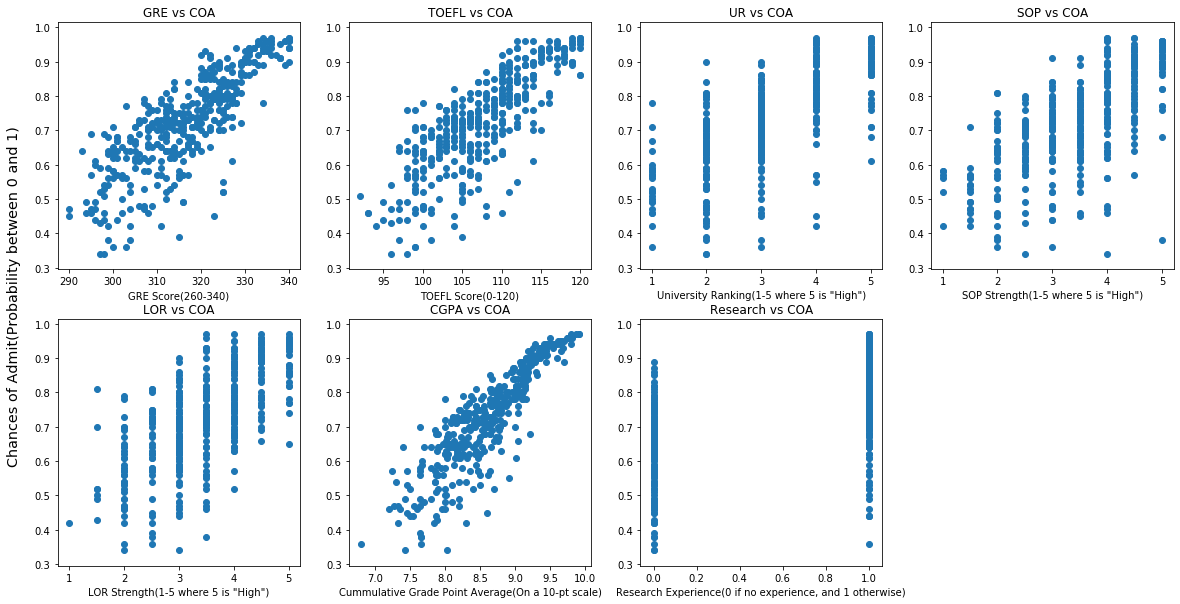

In [3]:
plt.rcParams['figure.figsize'] = 20,10
fig, ax = plt.subplots(2, 4)

ax[0,0].scatter(grad['GRE'], grad['COA'])
ax[0,0].set_title('GRE vs COA')
ax[0,0].set_xlabel('GRE Score(260-340)')

ax[0,1].scatter(grad['TOEFL'], grad['COA'])
ax[0,1].set_title('TOEFL vs COA')
ax[0,1].set_xlabel('TOEFL Score(0-120)')

ax[0,2].scatter(grad['UR'], grad['COA'])
ax[0,2].set_title('UR vs COA')
ax[0,2].set_xlabel('University Ranking(1-5 where 5 is "High")')

ax[0,3].scatter(grad['SOP'], grad['COA'])
ax[0,3].set_title('SOP vs COA')
ax[0,3].set_xlabel('SOP Strength(1-5 where 5 is "High")')

ax[1,0].scatter(grad['LOR'], grad['COA'])
ax[1,0].set_title('LOR vs COA')
ax[1,0].set_xlabel('LOR Strength(1-5 where 5 is "High")')

ax[1,1].scatter(grad['CGPA'], grad['COA'])
ax[1,1].set_title('CGPA vs COA')
ax[1,1].set_xlabel('Cummulative Grade Point Average(On a 10-pt scale)')

ax[1,2].scatter(grad['Research'], grad['COA'])
ax[1,2].set_title('Research vs COA')
ax[1,2].set_xlabel('Research Experience(0 if no experience, and 1 otherwise)')

ax[1,3].axis('off')

fig.text(0.09, 0.5, 'Chances of Admit(Probability between 0 and 1)', va='center', rotation='vertical', fontsize='x-large')

The scatter plots show a strong positive correlation between all input features and the target vector. However, this is a subjective approach of comparision and in order to gain a quantitative measure the spearman rank matrix is calculated in the following steps. 

## Spearman Rank Correlation Matrix

The Spearman Rank Correlation Matrix is calculated. In these steps, the correlation rank of all features are calculated with one another. The rank is a decimal no. in between -1 and 1 and a rank of 0 indicates no correlation.<br>
As the magnitude of the rank increases, the correlation increases. The sign of the rank denotes the direction of correlation. A positive rank means that both the features are proportional. A negative rank indicates that both the features are inversely proportional.

In [4]:
input_feature_list = list(grad.columns[1:9])
#input_feature_list

In [5]:
spearman_mat = [[0 for i in range(0, 9)] for j in range(0, 9)]
#spearman_mat

In [6]:
for i in range(1,9):
    spearman_mat[0][i] = input_feature_list[i-1]
for i in range(1,9):
    spearman_mat[i][0] = input_feature_list[i-1]
#spearman_mat

In [7]:
for i in range(1, 9):
    for j in range(i+1, 9):
        spearman_coeff, p_value = spearmanr(grad[input_feature_list[i-1]], grad[input_feature_list[j-1]])
        spearman_mat[i][j] = spearman_mat[j][i] = round(spearman_coeff,3)
    
#spearman_mat

In [8]:
spearman_df = pd.DataFrame(index=input_feature_list)
for i in range(0, len(input_feature_list)):
    spearman_df[input_feature_list[i]] = spearman_mat[i+1][1:]
spearman_df

,GRE,TOEFL,UR,SOP,LOR,CGPA,Research,COA
GRE,0.000,0.832,0.676,0.614,0.548,0.832,0.596,0.815
TOEFL,0.832,0.000,0.697,0.653,0.549,0.826,0.504,0.796
UR,0.676,0.697,0.000,0.740,0.653,0.751,0.454,0.732
SOP,0.614,0.653,0.740,0.000,0.727,0.724,0.444,0.695
LOR,0.548,0.549,0.653,0.727,0.000,0.666,0.400,0.671
CGPA,0.832,0.826,0.751,0.724,0.666,0.000,0.530,0.878
Research,0.596,0.504,0.454,0.444,0.400,0.530,0.000,0.582
COA,0.815,0.796,0.732,0.695,0.671,0.878,0.582,0.000


The ranks are calculated and stored in a 2D array (Matrix) and the values are then copied into a pandas dataframe to make it more visually convenient to interpret. The values indicate a clear strong(>=0.5) positive correlation between all input features and the target feature(COA).

## Training Dataset
The first 350 tuples are used for training and the values in target feature(COA), stored in dataframe named **y_train_df**, are encoded. 

In [9]:
grad_train = grad.iloc[:350, 1:9]
#grad_train

In [10]:
X_train = grad_train.iloc[:, 0:7]
y_train_df = pd.DataFrame(grad_train.iloc[:, 7])

## Encoding of training target feature
The target feature is encoded into 3 categories:
- Class 0 - AMBITIOUS
- Class 1 - REALISTIC
- Class 2 - SAFE

In [11]:
# AMBITIOUS
y_train_df[y_train_df['COA']<=0.5] = 0

In [12]:
# REALISTIC
y_train_df[y_train_df['COA']>0.5] = 1

In [13]:
# SAFE
y_train_df[y_train_df['COA']>0.85] = 2

The target feature training dataframe is converted to a pandas Series for training the model without errors.

In [14]:
y_train = pd.Series(y_train_df['COA'])

## Testing Dataset
The last 50 tuples are used for testing and the values in target feature(COA), stored in dataframe named **y_test_df**, are encoded. 

In [15]:
grad_test = grad.iloc[350:, 1:9]
#grad_test

In [16]:
X_test = grad_test.iloc[:, 0:7]
y_test_df = pd.DataFrame(grad_test.iloc[:, 7])

## Encoding of testing target feature
The target feature is encoded into 3 categories:
- Class 0 - AMBITIOUS
- Class 1 - REALISTIC
- Class 2 - SAFE

In [17]:
# AMBITIOUS
y_test_df[y_test_df['COA']<=0.5] = 0

In [18]:
# REALISTIC
y_test_df[y_test_df['COA']>0.5] = 1

In [19]:
# SAFE
y_test_df[y_test_df['COA']>0.85] = 2

The target feature training dataframe is converted to a pandas Series for training the model without errors.

In [20]:
y_test = pd.Series(y_test_df['COA'])
#y_test_cpy

## Logistic Regression Model

The model is instantiated and fit on the input features dataframe and the target feature(COA) Series.

In [21]:
logReg = LogisticRegression()

In [22]:
model = logReg.fit(X_train, y_train)

C:\Users\Yashveer\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The model is used to predict COA(Chances of Admit) for the testing input features dataframe. These predictions are compared with the testing target features Series. The comparision is done using sklearn's metrics module.

In [23]:
prediction = model.predict(X_test)
#prediction

In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean Absolute Error: 0.28
Mean Squared Error: 0.56
Root Mean Squared Error: 0.7483314773547883


The errors seem resonably low which means that the model had adequate performance. 

## Predicting Chances of Admit for User Input
In this last section the model is used to predict the Chances of Admit(COA) for a user's profile.

In [25]:
input_vector = pd.DataFrame(columns=input_feature_list[0:7])
#input_vector

## INPUT YOUR PROFILE - 

In [26]:
GRE = int(input("ENTER GRE SCORE (out of 340) - "))
TOEFL = int(input("ENTER TOEFL SCORE (out of 120) - "))
UR = int(input("ENTER UNIVERSITY RANKING (out of 5) - "))
SOP = int(input("ENTER SOP STRENGTH (out of 5) - "))
LOR = int(input("ENTER LOR STRENGTH (out of 5) - "))
CGPA = float(input("ENTER CGPA SCORE (out of 10) - "))
Research = int(input("ENTER 1 IF RESEARCH PAPERS ARE PUBLISHED. ENTER 0 OTHERWISE - "))

input_vector = input_vector.append({'GRE': GRE, 'TOEFL': TOEFL, 'UR': UR, 'SOP': SOP, 'LOR': LOR, 'CGPA': CGPA, 'Research': Research}, ignore_index=True)

predict = model.predict(input_vector)

print()
print("The Chances of Your Admit are : ", end='')
if predict[0] == 2:
    print("SAFE")
elif predict[0] == 1:
    print("MODERATE")
elif predict[0] == 0:
    print("AMBITIOUS")

ENTER GRE SCORE (out of 340) - 332
ENTER TOEFL SCORE (out of 120) - 113
ENTER UNIVERSITY RANKING (out of 5) - 4
ENTER SOP STRENGTH (out of 5) - 4
ENTER LOR STRENGTH (out of 5) - 4
ENTER CGPA SCORE (out of 10) - 9.03
ENTER 1 IF RESEARCH PAPERS ARE PUBLISHED. ENTER 0 OTHERWISE - 0

The Chances of Your Admit are : SAFE
